In this Notebook we are going to see some Analysis upon Data of Corona Virus with respect to World Happiness Index Data. From this data we are going to observe the relationshi between Corona Inflation Rates of serveral Countries With Respect to their Happiness Index.

In [97]:
#Import Libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns


In [3]:
covid_data = pd.read_csv("covid19_Confirmed_dataset.csv");

In [4]:
covid_data.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,4/21/20,4/22/20,4/23/20,4/24/20,4/25/20,4/26/20,4/27/20,4/28/20,4/29/20,4/30/20
0,NaN,Afghanistan,33.0000,65.0000,0,0,0,0,0,0,...,1092,1176,1279,1351,1463,1531,1703,1828,1939,2171
1,NaN,Albania,41.1533,20.1683,0,0,0,0,0,0,...,609,634,663,678,712,726,736,750,766,773
2,NaN,Algeria,28.0339,1.6596,0,0,0,0,0,0,...,2811,2910,3007,3127,3256,3382,3517,3649,3848,4006
3,NaN,Andorra,42.5063,1.5218,0,0,0,0,0,0,...,717,723,723,731,738,738,743,743,743,745
4,NaN,Angola,-11.2027,17.8739,0,0,0,0,0,0,...,24,25,25,25,25,26,27,27,27,27


In [5]:
covid_data.columns

Index(['Province/State', 'Country/Region', 'Lat', 'Long', '1/22/20', '1/23/20',
       '1/24/20', '1/25/20', '1/26/20', '1/27/20',
       ...
       '4/21/20', '4/22/20', '4/23/20', '4/24/20', '4/25/20', '4/26/20',
       '4/27/20', '4/28/20', '4/29/20', '4/30/20'],
      dtype='object', length=104)

Drop the Useless Columns

In [7]:
covid_data.drop(["Lat","Long"],axis=1,inplace=True)

In [8]:
covid_data.head()

,Province/State,Country/Region,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,...,4/21/20,4/22/20,4/23/20,4/24/20,4/25/20,4/26/20,4/27/20,4/28/20,4/29/20,4/30/20
0,NaN,Afghanistan,0,0,0,0,0,0,0,0,...,1092,1176,1279,1351,1463,1531,1703,1828,1939,2171
1,NaN,Albania,0,0,0,0,0,0,0,0,...,609,634,663,678,712,726,736,750,766,773
2,NaN,Algeria,0,0,0,0,0,0,0,0,...,2811,2910,3007,3127,3256,3382,3517,3649,3848,4006
3,NaN,Andorra,0,0,0,0,0,0,0,0,...,717,723,723,731,738,738,743,743,743,745
4,NaN,Angola,0,0,0,0,0,0,0,0,...,24,25,25,25,25,26,27,27,27,27


In [9]:
covid_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 266 entries, 0 to 265
Columns: 102 entries, Province/State to 4/30/20
dtypes: int64(100), object(2)
memory usage: 212.1+ KB


In [11]:
covid_data.shape

(266, 102)

In [14]:
covid_data.describe()

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,4/21/20,4/22/20,4/23/20,4/24/20,4/25/20,4/26/20,4/27/20,4/28/20,4/29/20,4/30/20
count,266.000000,266.000000,266.000000,266.000000,266.000000,266.000000,266.000000,266.000000,266.000000,266.000000,...,266.000000,266.000000,266.000000,266.000000,266.000000,266.000000,266.000000,2.660000e+02,2.660000e+02,2.660000e+02
mean,2.086466,2.458647,3.537594,5.390977,7.962406,11.003759,20.969925,23.180451,30.954887,37.319549,...,9582.033835,9865.063910,10179.481203,10506.875940,10826.203008,11102.887218,11360.176692,1.163550e+04,1.191693e+04,1.224378e+04
std,27.279200,27.377862,34.083035,47.434934,66.289178,89.313757,219.187744,220.524977,303.897894,360.297287,...,55192.088929,56941.164602,58758.271305,60812.226451,62832.838104,64533.887576,65963.984777,6.750782e+04,6.918917e+04,7.102980e+04
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,58.000000,62.250000,67.000000,72.250000,72.250000,74.000000,74.250000,7.500000e+01,7.600000e+01,7.725000e+01
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,339.000000,342.500000,372.500000,403.000000,403.000000,423.000000,423.500000,4.335000e+02,4.555000e+02,4.665000e+02
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1712.500000,1767.750000,1781.250000,1800.500000,1894.250000,1928.250000,1974.500000,2.020000e+03,2.047250e+03,2.105250e+03
max,444.000000,444.000000,549.000000,761.000000,1058.000000,1423.000000,3554.000000,3554.000000,4903.000000,5806.000000,...,811865.000000,840351.000000,869170.000000,905358.000000,938154.000000,965785.000000,988197.000000,1.012582e+06,1.039909e+06,1.069424e+06


#Aggregate The Data Withrespect to their Country/Region

In [17]:
covid_df_agg = covid_data.groupby("Country/Region").sum()

In [19]:
covid_df_agg.head(10)

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,4/21/20,4/22/20,4/23/20,4/24/20,4/25/20,4/26/20,4/27/20,4/28/20,4/29/20,4/30/20
Country/Region,,,,,,,,,,,,,,,,,,,,,
Afghanistan,0,0,0,0,0,0,0,0,0,0,...,1092,1176,1279,1351,1463,1531,1703,1828,1939,2171
Albania,0,0,0,0,0,0,0,0,0,0,...,609,634,663,678,712,726,736,750,766,773
Algeria,0,0,0,0,0,0,0,0,0,0,...,2811,2910,3007,3127,3256,3382,3517,3649,3848,4006
Andorra,0,0,0,0,0,0,0,0,0,0,...,717,723,723,731,738,738,743,743,743,745
Angola,0,0,0,0,0,0,0,0,0,0,...,24,25,25,25,25,26,27,27,27,27
Antigua and Barbuda,0,0,0,0,0,0,0,0,0,0,...,23,24,24,24,24,24,24,24,24,24
Argentina,0,0,0,0,0,0,0,0,0,0,...,3031,3144,3435,3607,3780,3892,4003,4127,4285,4428
Armenia,0,0,0,0,0,0,0,0,0,0,...,1401,1473,1523,1596,1677,1746,1808,1867,1932,2066
Australia,0,0,0,0,4,5,5,6,9,9,...,6645,6652,6662,6677,6694,6714,6721,6744,6752,6766


In [20]:
covid_df_agg.shape

(187, 100)

# Exploratory Data Analysis

In [98]:
#Plot and Visualize the Growth of Cases in countries 

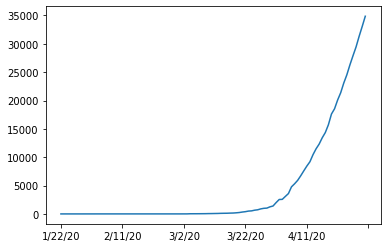

In [21]:
covid_df_agg.loc['India'].plot()

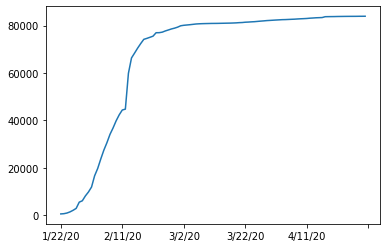

In [22]:
covid_df_agg.loc['China'].plot()

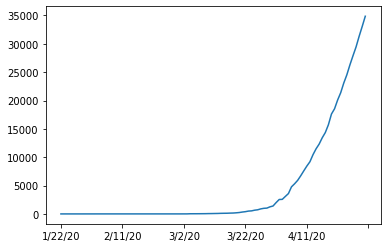

In [23]:
covid_df_agg.loc['India'].plot()

In [99]:
#Plotting The Inflation of cases Day by Day

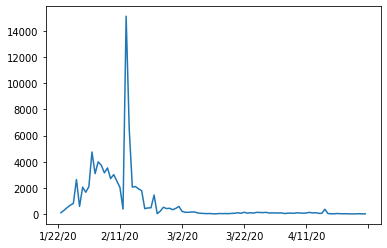

In [24]:
covid_df_agg.loc["China"].diff().plot()

In [25]:
covid_df_agg.loc["China"].diff().max()

15136.0

1893.0


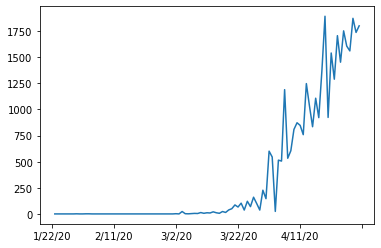

In [30]:
print(covid_df_agg.loc["India"].diff().max())
covid_df_agg.loc["India"].diff().plot()

6557.0


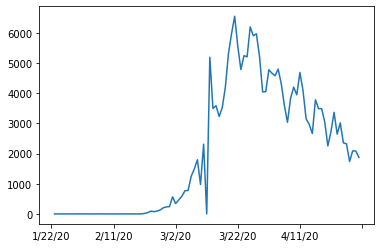

In [31]:
print(covid_df_agg.loc["Italy"].diff().max())
covid_df_agg.loc["Italy"].diff().plot()

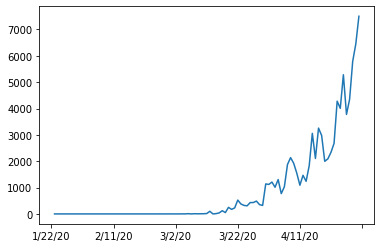

In [32]:
covid_df_agg.loc["Brazil"].diff().plot()

In [39]:
covid_df_agg.index

Index(['Afghanistan', 'Albania', 'Algeria', 'Andorra', 'Angola',
       'Antigua and Barbuda', 'Argentina', 'Armenia', 'Australia', 'Austria',
       ...
       'United Kingdom', 'Uruguay', 'Uzbekistan', 'Venezuela', 'Vietnam',
       'West Bank and Gaza', 'Western Sahara', 'Yemen', 'Zambia', 'Zimbabwe'],
      dtype='object', name='Country/Region', length=187)

In [41]:
covid_df_agg.head()

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,4/21/20,4/22/20,4/23/20,4/24/20,4/25/20,4/26/20,4/27/20,4/28/20,4/29/20,4/30/20
Country/Region,,,,,,,,,,,,,,,,,,,,,
Afghanistan,0,0,0,0,0,0,0,0,0,0,...,1092,1176,1279,1351,1463,1531,1703,1828,1939,2171
Albania,0,0,0,0,0,0,0,0,0,0,...,609,634,663,678,712,726,736,750,766,773
Algeria,0,0,0,0,0,0,0,0,0,0,...,2811,2910,3007,3127,3256,3382,3517,3649,3848,4006
Andorra,0,0,0,0,0,0,0,0,0,0,...,717,723,723,731,738,738,743,743,743,745
Angola,0,0,0,0,0,0,0,0,0,0,...,24,25,25,25,25,26,27,27,27,27


In [100]:
#Find Maximum Inflation Rate of Every Country And Them into DataSet

In [42]:
country = list(covid_df_agg.index)

In [43]:
max_infl_rate = []
for c in country:
    max_infl_rate.append(covid_df_agg.loc[c].diff().max())

In [44]:
covid_df_agg["maximum_inflation_rate"] = max_infl_rate


In [45]:
covid_df_agg.head(10)

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,4/22/20,4/23/20,4/24/20,4/25/20,4/26/20,4/27/20,4/28/20,4/29/20,4/30/20,maximum_inflation_rate
Country/Region,,,,,,,,,,,,,,,,,,,,,
Afghanistan,0,0,0,0,0,0,0,0,0,0,...,1176,1279,1351,1463,1531,1703,1828,1939,2171,232.0
Albania,0,0,0,0,0,0,0,0,0,0,...,634,663,678,712,726,736,750,766,773,34.0
Algeria,0,0,0,0,0,0,0,0,0,0,...,2910,3007,3127,3256,3382,3517,3649,3848,4006,199.0
Andorra,0,0,0,0,0,0,0,0,0,0,...,723,723,731,738,738,743,743,743,745,43.0
Angola,0,0,0,0,0,0,0,0,0,0,...,25,25,25,25,26,27,27,27,27,5.0
Antigua and Barbuda,0,0,0,0,0,0,0,0,0,0,...,24,24,24,24,24,24,24,24,24,6.0
Argentina,0,0,0,0,0,0,0,0,0,0,...,3144,3435,3607,3780,3892,4003,4127,4285,4428,291.0
Armenia,0,0,0,0,0,0,0,0,0,0,...,1473,1523,1596,1677,1746,1808,1867,1932,2066,134.0
Australia,0,0,0,0,4,5,5,6,9,9,...,6652,6662,6677,6694,6714,6721,6744,6752,6766,497.0


In [48]:
covid_data_final = covid_df_agg["maximum_inflation_rate"]

In [83]:
final_df = pd.DataFrame(covid_data_final)

Create A Final DataSet Which Contains Countries and Corona Virus max inflation rate

In [53]:
final_df.head()

,maximum_inflation_rate
Country/Region,
Afghanistan,232.0
Albania,34.0
Algeria,199.0
Andorra,43.0
Angola,5.0


In [54]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5 entries, Afghanistan to Angola
Data columns (total 1 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   maximum_inflation_rate  5 non-null      float64
dtypes: float64(1)
memory usage: 80.0+ bytes


# Analysis Upon World Happiness Report Data

Import Data

In [57]:
df = pd.read_csv("worldwide_happiness_report.csv")
df.head(10)

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393
1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410
2,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341
3,4,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118
4,5,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298
5,6,Switzerland,7.480,1.452,1.526,1.052,0.572,0.263,0.343
6,7,Sweden,7.343,1.387,1.487,1.009,0.574,0.267,0.373
7,8,New Zealand,7.307,1.303,1.557,1.026,0.585,0.330,0.380
8,9,Canada,7.278,1.365,1.505,1.039,0.584,0.285,0.308
9,10,Austria,7.246,1.376,1.475,1.016,0.532,0.244,0.226


In [58]:
df.columns

Index(['Overall rank', 'Country or region', 'Score', 'GDP per capita',
       'Social support', 'Healthy life expectancy',
       'Freedom to make life choices', 'Generosity',
       'Perceptions of corruption'],
      dtype='object')

Drop Useless Columns

In [59]:
df.drop(["Freedom to make life choices","Generosity","Perceptions of corruption"],axis=1,inplace=True)

In [60]:
df.head()

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy
0,1,Finland,7.769,1.340,1.587,0.986
1,2,Denmark,7.600,1.383,1.573,0.996
2,3,Norway,7.554,1.488,1.582,1.028
3,4,Iceland,7.494,1.380,1.624,1.026
4,5,Netherlands,7.488,1.396,1.522,0.999


Set Country As a Index

In [70]:
df.set_index("Country or region",inplace=True)

In [62]:
df.drop("Overall rank",axis=1,inplace=True)

In [74]:
df.head()

,Score,GDP per capita,Social support,Healthy life expectancy
Country or region,,,,
Finland,7.769,1.340,1.587,0.986
Denmark,7.600,1.383,1.573,0.996
Norway,7.554,1.488,1.582,1.028
Iceland,7.494,1.380,1.624,1.026
Netherlands,7.488,1.396,1.522,0.999


**Now Merge Both the Data's**

In [66]:
final_df.head()

,maximum_inflation_rate
Country/Region,
Afghanistan,232.0
Albania,34.0
Algeria,199.0
Andorra,43.0
Angola,5.0


In [84]:
data = df.join(final_df).copy()

In [85]:
data.head()

,Score,GDP per capita,Social support,Healthy life expectancy,maximum_inflation_rate
Country or region,,,,,
Finland,7.769,1.340,1.587,0.986,267.0
Denmark,7.600,1.383,1.573,0.996,391.0
Norway,7.554,1.488,1.582,1.028,386.0
Iceland,7.494,1.380,1.624,1.026,99.0
Netherlands,7.488,1.396,1.522,0.999,1346.0


Visuzlize This Data Using Various Seaborn Plots

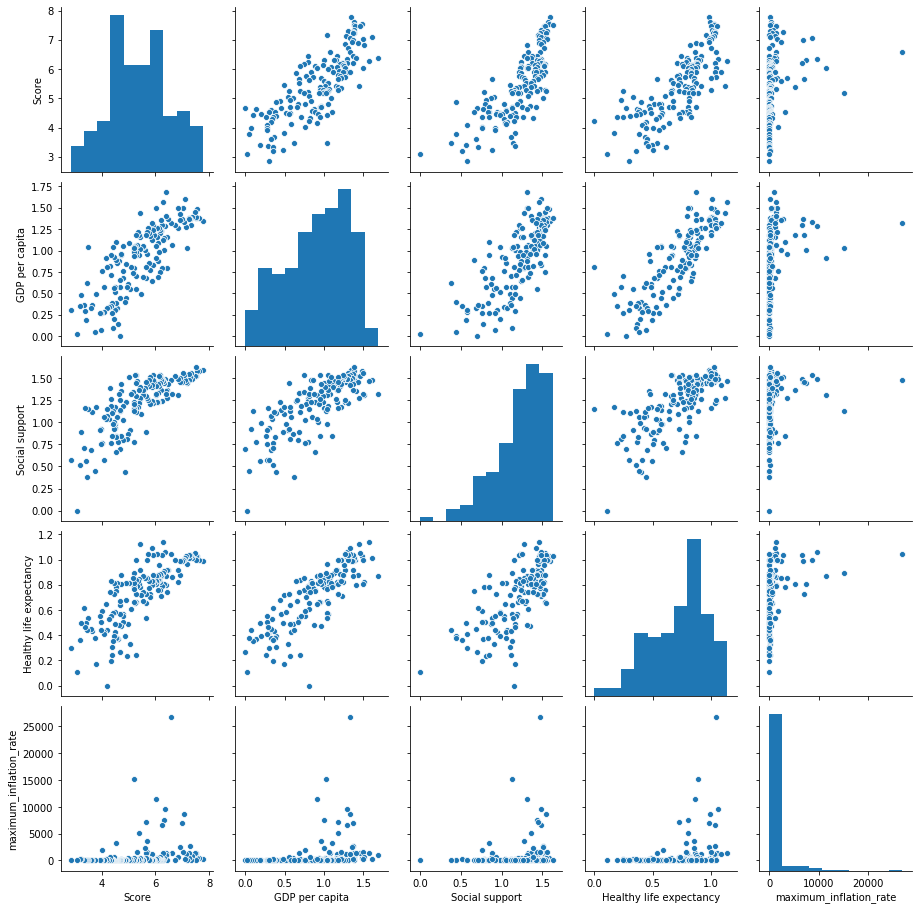

In [87]:
sns.pairplot(data)

In [88]:
data.corr()

,Score,GDP per capita,Social support,Healthy life expectancy,maximum_inflation_rate
Score,1.000000,0.793883,0.777058,0.779883,0.228783
GDP per capita,0.793883,1.000000,0.754906,0.835462,0.250118
Social support,0.777058,0.754906,1.000000,0.719009,0.191958
Healthy life expectancy,0.779883,0.835462,0.719009,1.000000,0.289263
maximum_inflation_rate,0.228783,0.250118,0.191958,0.289263,1.000000


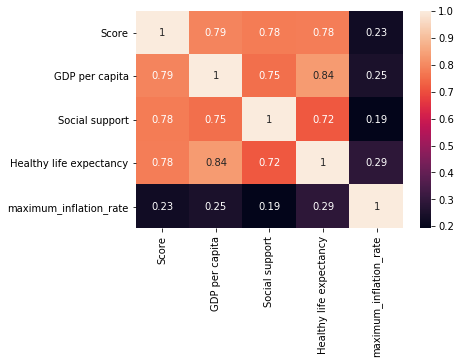

In [104]:
sns.heatmap(data.corr(),annot=True)

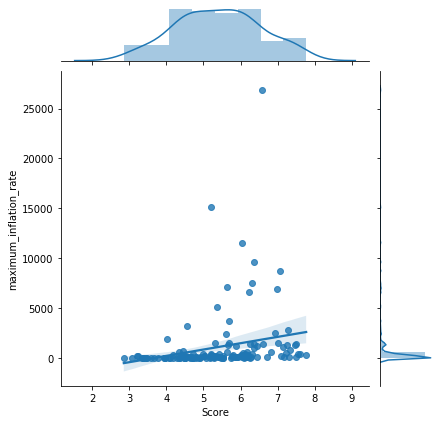

In [89]:
sns.jointplot("Score","maximum_inflation_rate",data=data,kind="reg")

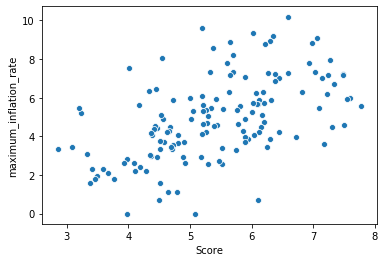

In [90]:
x = data["Score"]
y = np.log(data["maximum_inflation_rate"])
sns.scatterplot(x,y)

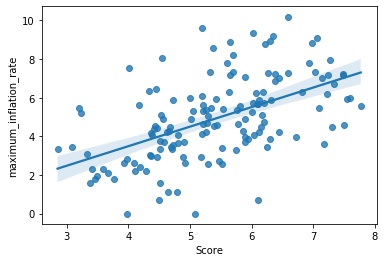

In [93]:
x = data["Score"]
y = np.log(data["maximum_inflation_rate"])
sns.regplot(x,y)

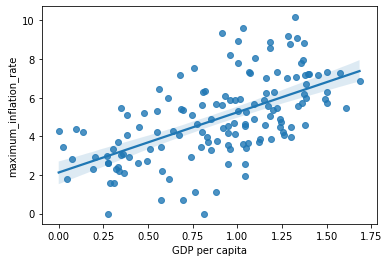

In [94]:
x = data["GDP per capita"]
y = np.log(data["maximum_inflation_rate"])
sns.regplot(x,y)

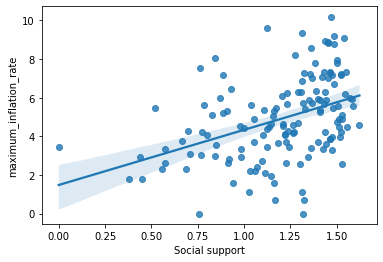

In [95]:
x = data["Social support"]
y = np.log(data["maximum_inflation_rate"])
sns.regplot(x,y)

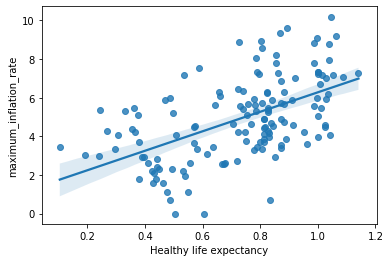

In [96]:
x = data["Healthy life expectancy"]
y = np.log(data["maximum_inflation_rate"])
sns.regplot(x,y)

# The End